In [19]:
import pandas as pd
import numpy as np

In [2]:
#Step 1 Load the data from the “train.csv” file into a DataFrame.
df= pd.read_csv(r'C:\Users\nickm\Documents\train.csv')

In [3]:
# Step 2:  check the dimension of the table

df.shape

(891, 12)

In [4]:
#Step 3:  Look at the data

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
#Step 5:  what type of variables are in the table 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Connors, Mr. Patrick",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
#6.Make some histograms of your data 
import matplotlib.pyplot as plt

In [8]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

In [9]:
# Specify the features of interest
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']


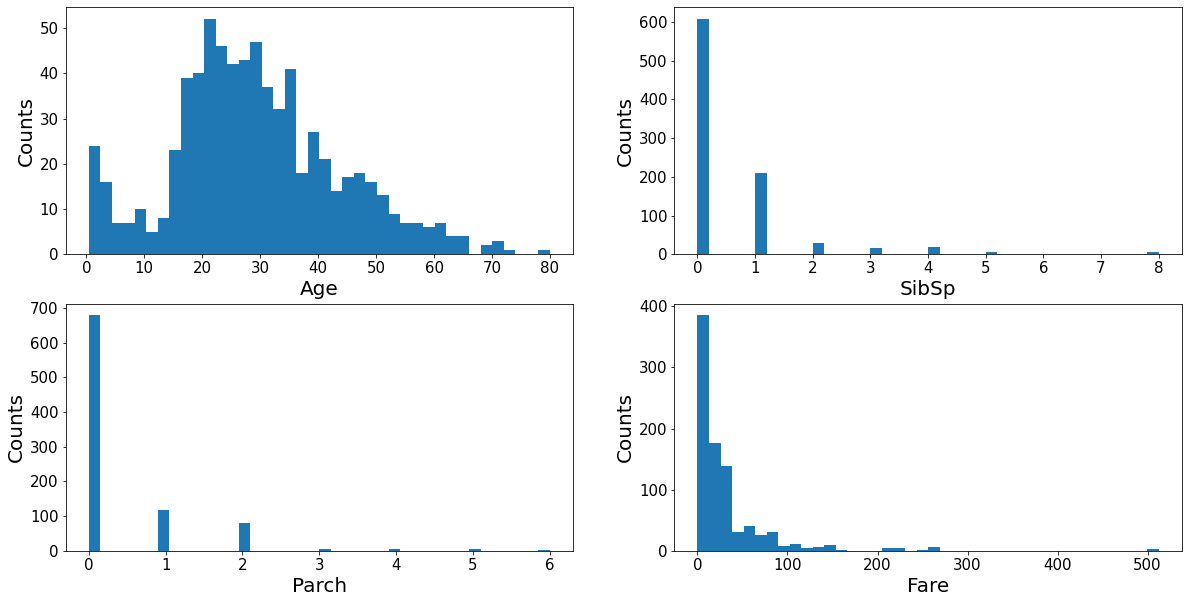

In [10]:
# draw histograms
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()


In [11]:
#7:  Barcharts: set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)


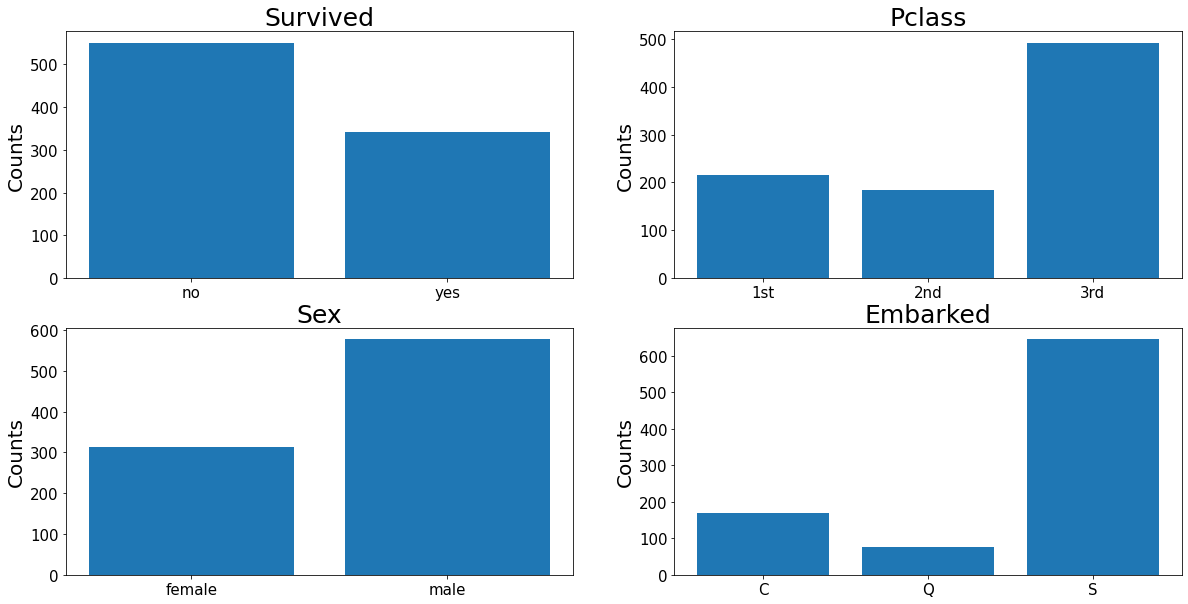

In [12]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
# make the data read to feed into the visulizer
X_Survived = df.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Survived']
Y_Survived = df.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_Survived, Y_Survived)
axes[0, 0].set_title('Survived', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)


# make the data read to feed into the visulizer
X_Pclass = df.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Pclass']
Y_Pclass = df.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_Pclass, Y_Pclass)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)


# make the data read to feed into the visulizer
X_Sex = df.groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_Sex = df.groupby('Sex').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_Sex, Y_Sex)
axes[1, 0].set_title('Sex', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)


# make the data read to feed into the visulizer
X_Embarked = df.groupby('Embarked').size().reset_index(name='Counts')['Embarked']
Y_Embarked = df.groupby('Embarked').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_Embarked, Y_Embarked)
axes[1, 1].set_title('Embarked', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
plt.show()


In [22]:
pip install yellowbrick

  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)
Note: you may need to restart the kernel to use updated packages.


In [17]:
#Step 8: Pearson Ranking
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D


In [21]:
# extract the numpy arrays from the data frame
X = df[num_features]

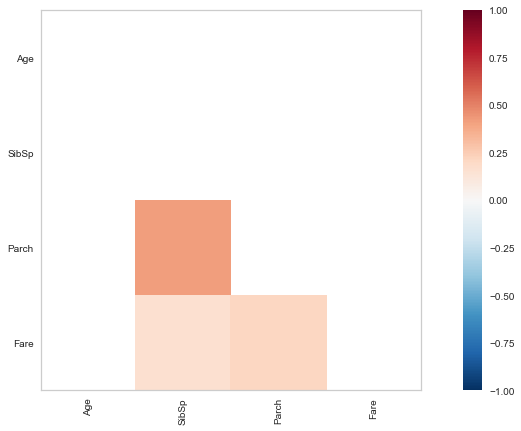

In [23]:
# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
#visualizer.poof(outpath="d://pcoords1.png") # Draw/show/poof the data
plt.show()

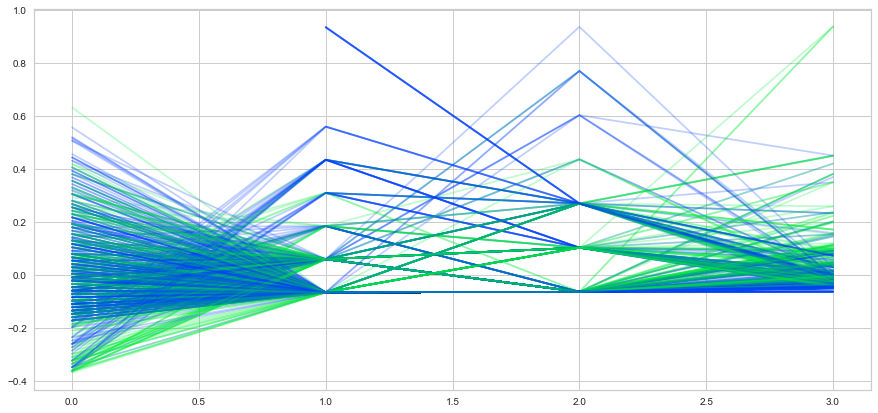

In [28]:
# Step 9:  Compare variables against Survived and Not Survived
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['Not-survived', 'Survived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

# copy data to a new dataframe
data_norm = df.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (df[feature] - df[feature].mean(skipna=True)) / (df[feature].max(skipna=True) - df[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features]
y = df.Survived

# Instantiate the visualizer
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)


visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
#visualizer.poof(outpath="d://pcoords2.png") # Draw/show/poof the data
plt.show();



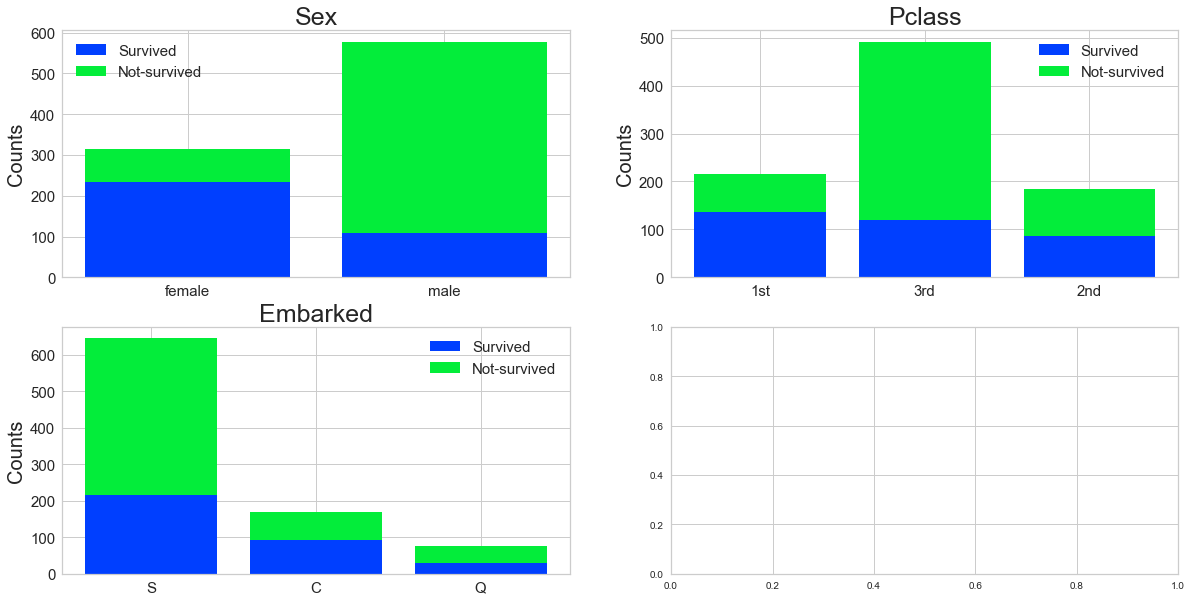

In [29]:
# Step 10 - stacked bar charts to compare survived/not survived
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
Sex_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[df['Survived']==1]['Sex'].value_counts()
Sex_not_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[df['Survived']==0]['Sex'].value_counts()
Sex_not_survived = Sex_not_survived.reindex(index = Sex_survived.index)
# make the bar plot
p1 = axes[0, 0].bar(Sex_survived.index, Sex_survived.values)
p2 = axes[0, 0].bar(Sex_not_survived.index, Sex_not_survived.values, bottom=Sex_survived.values)
axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Survived', 'Not-survived'), fontsize = 15)

# make the data read to feed into the visualizer
Pclass_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[df['Survived']==1]['Pclass'].value_counts()
Pclass_not_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[df['Survived']==0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index = Pclass_survived.index)
# make the bar plot
p3 = axes[0, 1].bar(Pclass_survived.index, Pclass_survived.values)
p4 = axes[0, 1].bar(Pclass_not_survived.index, Pclass_not_survived.values, bottom=Pclass_survived.values)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Survived', 'Not-survived'), fontsize = 15)

# make the data read to feed into the visualizer
Embarked_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[df['Survived']==1]['Embarked'].value_counts()
Embarked_not_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[df['Survived']==0]['Embarked'].value_counts()
Embarked_not_survived = Embarked_not_survived.reindex(index = Embarked_survived.index)
# make the bar plot
p5 = axes[1, 0].bar(Embarked_survived.index, Embarked_survived.values)
p6 = axes[1, 0].bar(Embarked_not_survived.index, Embarked_not_survived.values, bottom=Embarked_survived.values)
axes[1, 0].set_title('Embarked', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Survived', 'Not-survived'), fontsize = 15)
plt.show()
